In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os arquivos CSV
df1 = pd.read_csv('theglobaleconomy01.csv')
df2 = pd.read_csv('theglobaleconomy02.csv')
df3 = pd.read_csv('GPD Per Capita.csv', skiprows=4)

# Renomear as colunas de df3
df3.rename(columns={'Country Name': 'Country'}, inplace=True)
df3.rename(columns={'2023': 'GPD Per Capita 2023'}, inplace=True)

# Remover espaços extras e padronizar os nomes dos países
df3['Country'] = df3['Country'].str.strip().str.upper()
df1['Country'] = df1['Country'].str.strip().str.upper()
df2['Country'] = df2['Country'].str.strip().str.upper()

# Filtrar os dados de 2023 em df3
df3_2023 = df3[['Country', 'GPD Per Capita 2023']]

# Unir os dois primeiros arquivos
df_concat = pd.concat([df1, df2], ignore_index=True)

# Filtrar apenas os países que estão em df_concat no arquivo de 2023 (df3_2023)
df_final = df3_2023[df3_2023['Country'].isin(df_concat['Country'])]

# Concatenar os dados filtrados com os outros dois arquivos
df_combined = pd.merge(df_concat, df_final, on='Country', how='inner')

# Exibir as primeiras linhas do resultado final
print(df_combined.head())
print(f"Número de linhas no DataFrame combinado: {df_combined.shape[0]}") #check dos dados para ver se está ok




       Country Code ContinentCode  Year  \
0  AFGHANISTAN  AFG            AS  2000   
1  AFGHANISTAN  AFG            AS  2001   
2  AFGHANISTAN  AFG            AS  2002   
3  AFGHANISTAN  AFG            AS  2003   
4  AFGHANISTAN  AFG            AS  2004   

   Government spending as percent of GDP  Government debt as percent of GDP  \
0                                    NaN                                NaN   
1                                    NaN                                NaN   
2                                    NaN                             345.98   
3                                    NaN                             270.60   
4                                    NaN                             244.97   

   Economic growth forecast  Inflation forecast  Unemployment rate forecast  \
0                       NaN                 NaN                         NaN   
1                       NaN                 NaN                         NaN   
2                       NaN  

In [2]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9639 entries, 0 to 9638
Data columns (total 39 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Country                                                   9639 non-null   object 
 1   Code                                                      9639 non-null   object 
 2   ContinentCode                                             8441 non-null   object 
 3   Year                                                      9639 non-null   int64  
 4   Government spending as percent of GDP                     6488 non-null   float64
 5   Government debt as percent of GDP                         3426 non-null   float64
 6   Economic growth forecast                                  9238 non-null   float64
 7   Inflation forecast                                        9154 non-null   float64
 8   Unemployment rate 

In [3]:
df_combined.dtypes

,0
Country,object
Code,object
ContinentCode,object
Year,int64
Government spending as percent of GDP,float64
Government debt as percent of GDP,float64
Economic growth forecast,float64
Inflation forecast,float64
Unemployment rate forecast,float64
Government effectiveness index (-2.5 weak; 2.5 strong),float64


In [4]:
df_combined.describe(include='all')

,Country,Code,ContinentCode,Year,Government spending as percent of GDP,Government debt as percent of GDP,Economic growth forecast,Inflation forecast,Unemployment rate forecast,Government effectiveness index (-2.5 weak; 2.5 strong),...,Unemployment rate,Labor force participation rate,Fiscal balance percent of GDP,Budget balance forecast percent of GDP,Political stability index (-2.5 weak; 2.5 strong),Civil liberties index 7 (weak) - 1 (strong),Cost of starting a business % of income per capita,Informal economy MIMIC method,Informal economy DGE method,GPD Per Capita 2023
count,9639,9639,8441,9639.000000,6488.000000,3426.000000,9238.000000,9154.000000,2611.000000,7102.000000,...,3646.000000,3646.000000,3318.000000,2103.000000,3588.000000,4034.000000,2479.000000,2856.000000,2772.000000,8889.000000
unique,169,169,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,KUWAIT,KWT,AF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,58,58,2659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2013.868451,16.610805,56.120409,3.537173,6.710990,8.525354,0.005348,...,7.800527,60.892820,-2.095075,-2.457537,-0.019156,3.216658,44.677088,32.972689,30.657973,17665.241992
std,NaN,NaN,NaN,8.315171,6.993076,45.565828,5.411658,25.640683,5.911569,0.990687,...,5.775848,10.349012,5.978662,4.401560,0.967628,1.798603,95.858408,12.578284,12.083799,23167.457752
min,NaN,NaN,NaN,2000.000000,2.050000,0.400000,-50.340000,-29.280000,0.700000,-2.440000,...,0.100000,31.400000,-54.500000,-25.120000,-3.310000,1.000000,0.000000,8.200000,7.900000,199.580760
25%,NaN,NaN,NaN,2007.000000,11.940000,29.275000,1.670000,1.900000,4.950000,-0.740000,...,3.790000,54.785000,-4.717500,-4.230000,-0.630000,2.000000,4.600000,22.875000,21.500000,2309.521620
50%,NaN,NaN,NaN,2014.000000,16.135000,46.645000,3.500000,3.450000,6.950000,-0.140000,...,6.005000,60.735000,-2.500000,-2.240000,0.050000,3.000000,14.100000,33.200000,30.450000,7329.976541
75%,NaN,NaN,NaN,2021.000000,19.720000,69.980000,5.560000,6.640000,10.040000,0.670000,...,10.347500,66.940000,-0.200000,-0.405000,0.800000,5.000000,45.600000,41.000000,39.400000,22990.013568


In [5]:
df_combined[['Happiness Index 0 (unhappy) - 10 (happy)']].mean()

,0
Happiness Index 0 (unhappy) - 10 (happy),5.499715


In [6]:
print(df_combined.isnull().sum())

Country                                                        0
Code                                                           0
ContinentCode                                               1198
Year                                                           0
Government spending as percent of GDP                       3151
Government debt as percent of GDP                           6213
Economic growth forecast                                     401
Inflation forecast                                           485
Unemployment rate forecast                                  7028
Government effectiveness index (-2.5 weak; 2.5 strong)      2537
Control of corruption (-2.5 weak; 2.5 strong)               2517
Corruption Perceptions Index 100 = no corruption            3359
Population size in millions                                 5631
Health spending as percent of GDP                           6318
Poverty percent of population                               8635
Poverty ratio percent liv

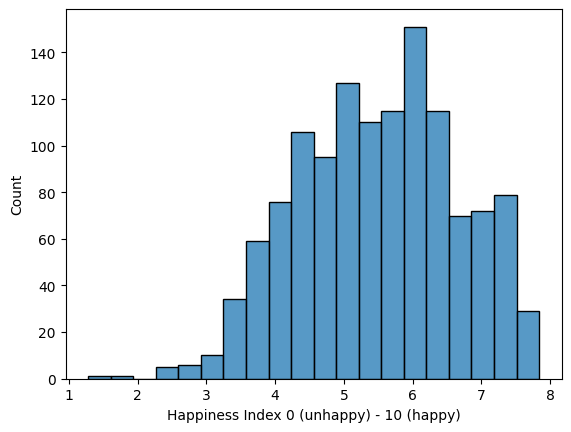

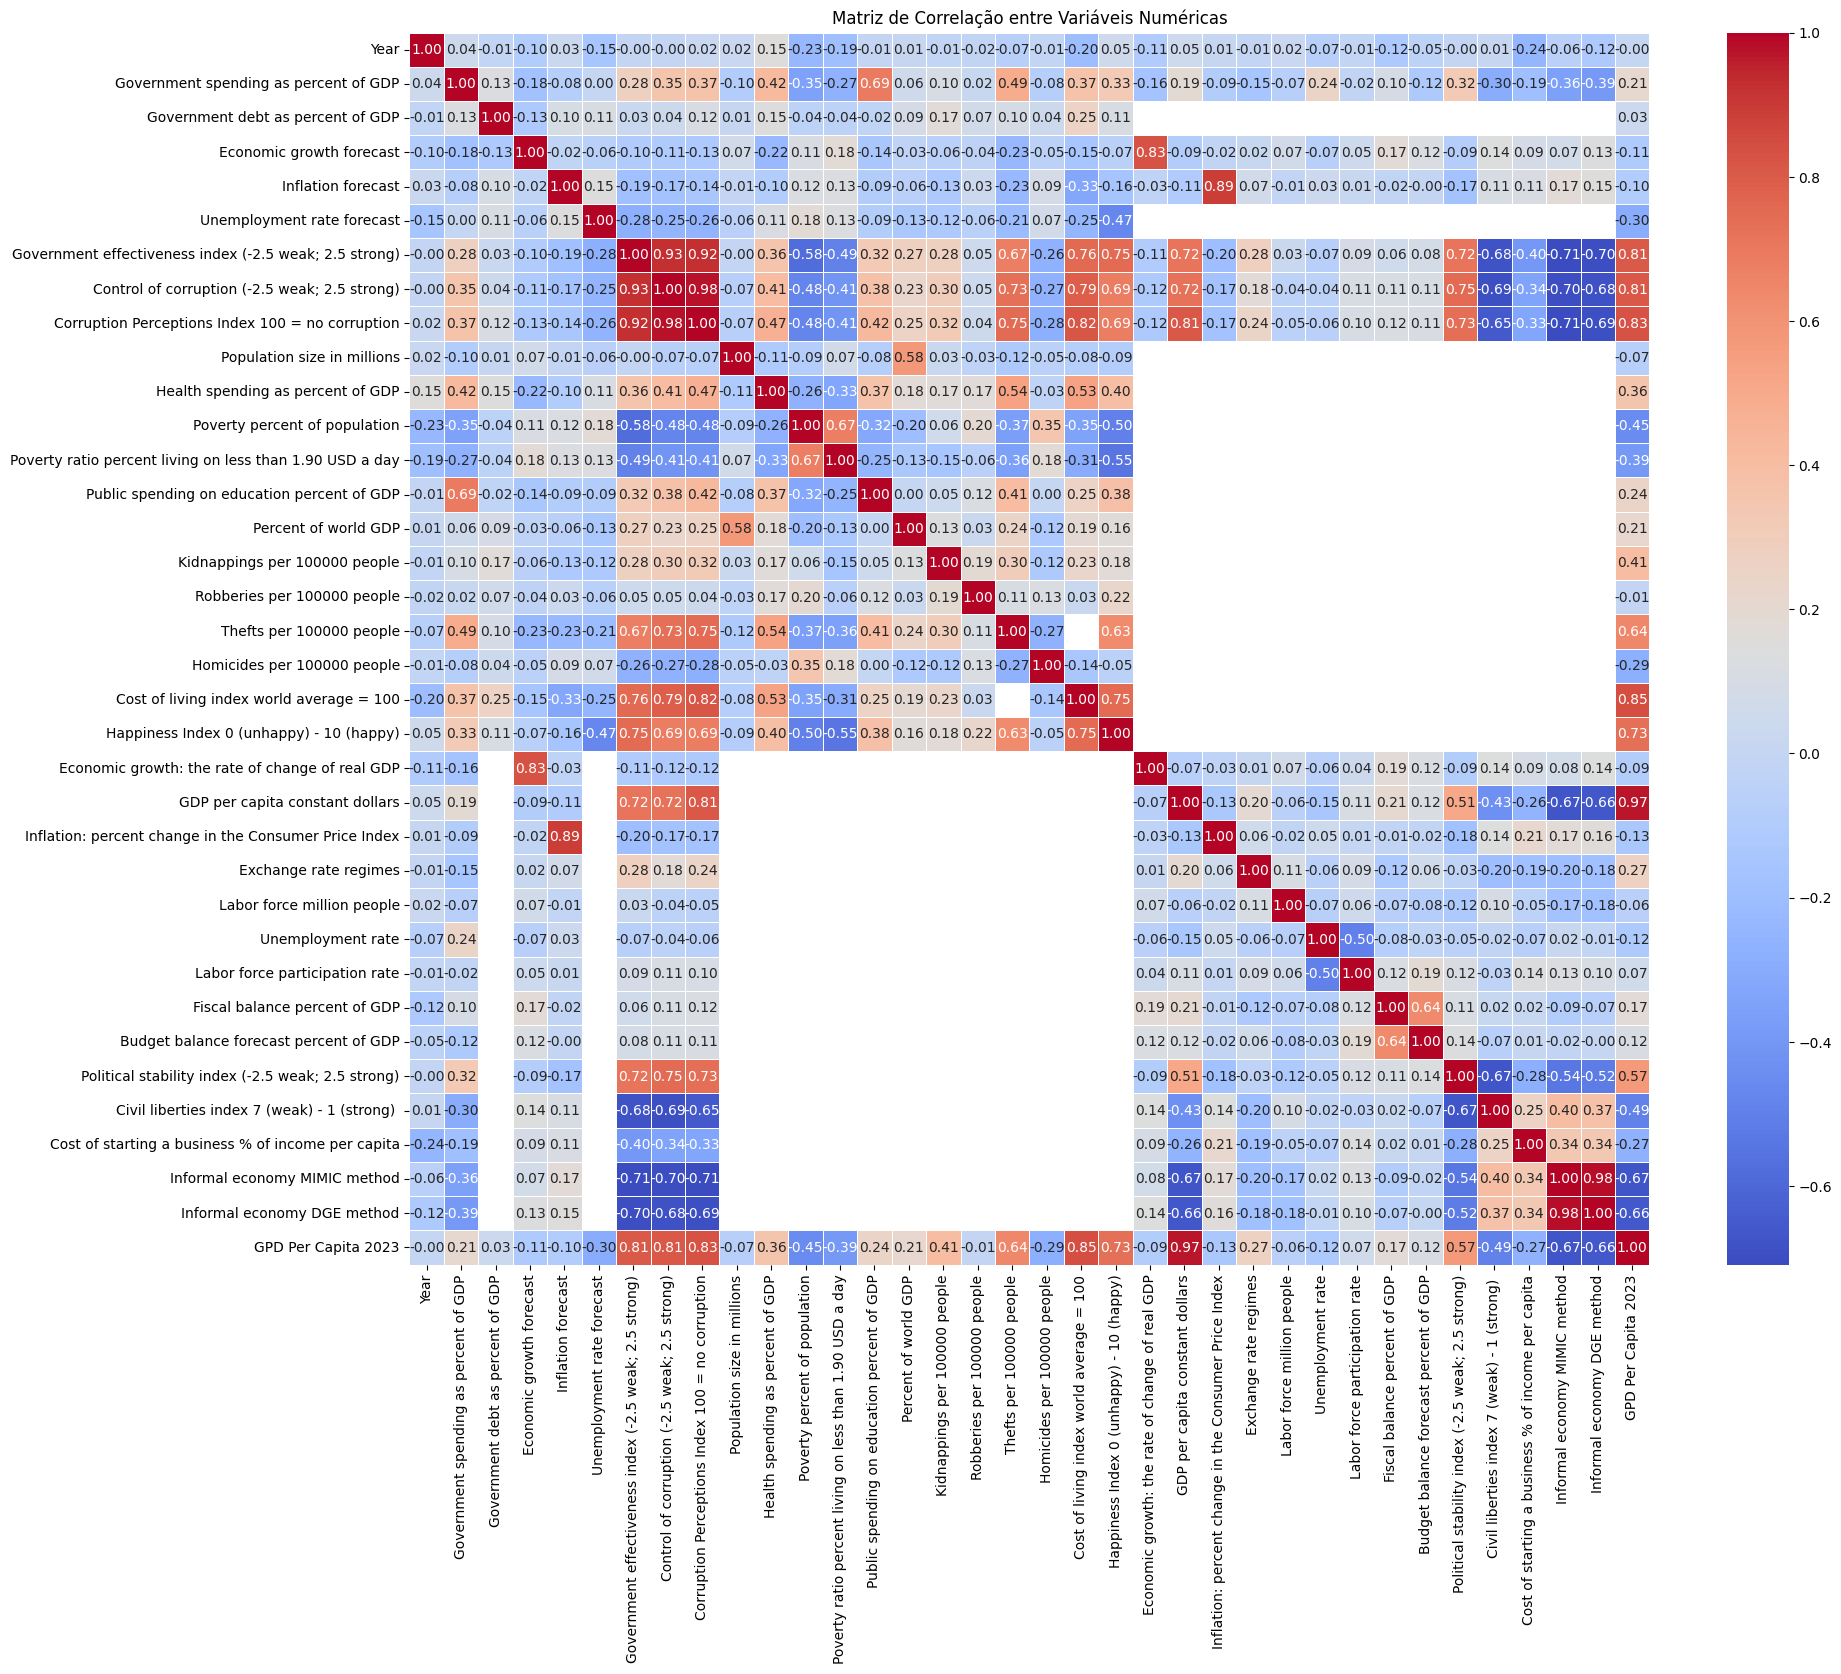

In [7]:
# Histograma para visualizar a distribuição de uma variável, como a felicidade
sns.histplot(df_combined['Happiness Index 0 (unhappy) - 10 (happy)'], bins=20)
plt.show()

df_numerical = df_combined.select_dtypes(include=['float64', 'int64'])

# Remover valores nulos com dropna())
#df_combined.dropna(inplace=True) ## se deixo ativado está anulando todas as linhas e depois nao faz os outros gráficos

# Calcular a matriz de correlação
corr_matrix = df_numerical.corr()

# Plotar o heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10}, linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()





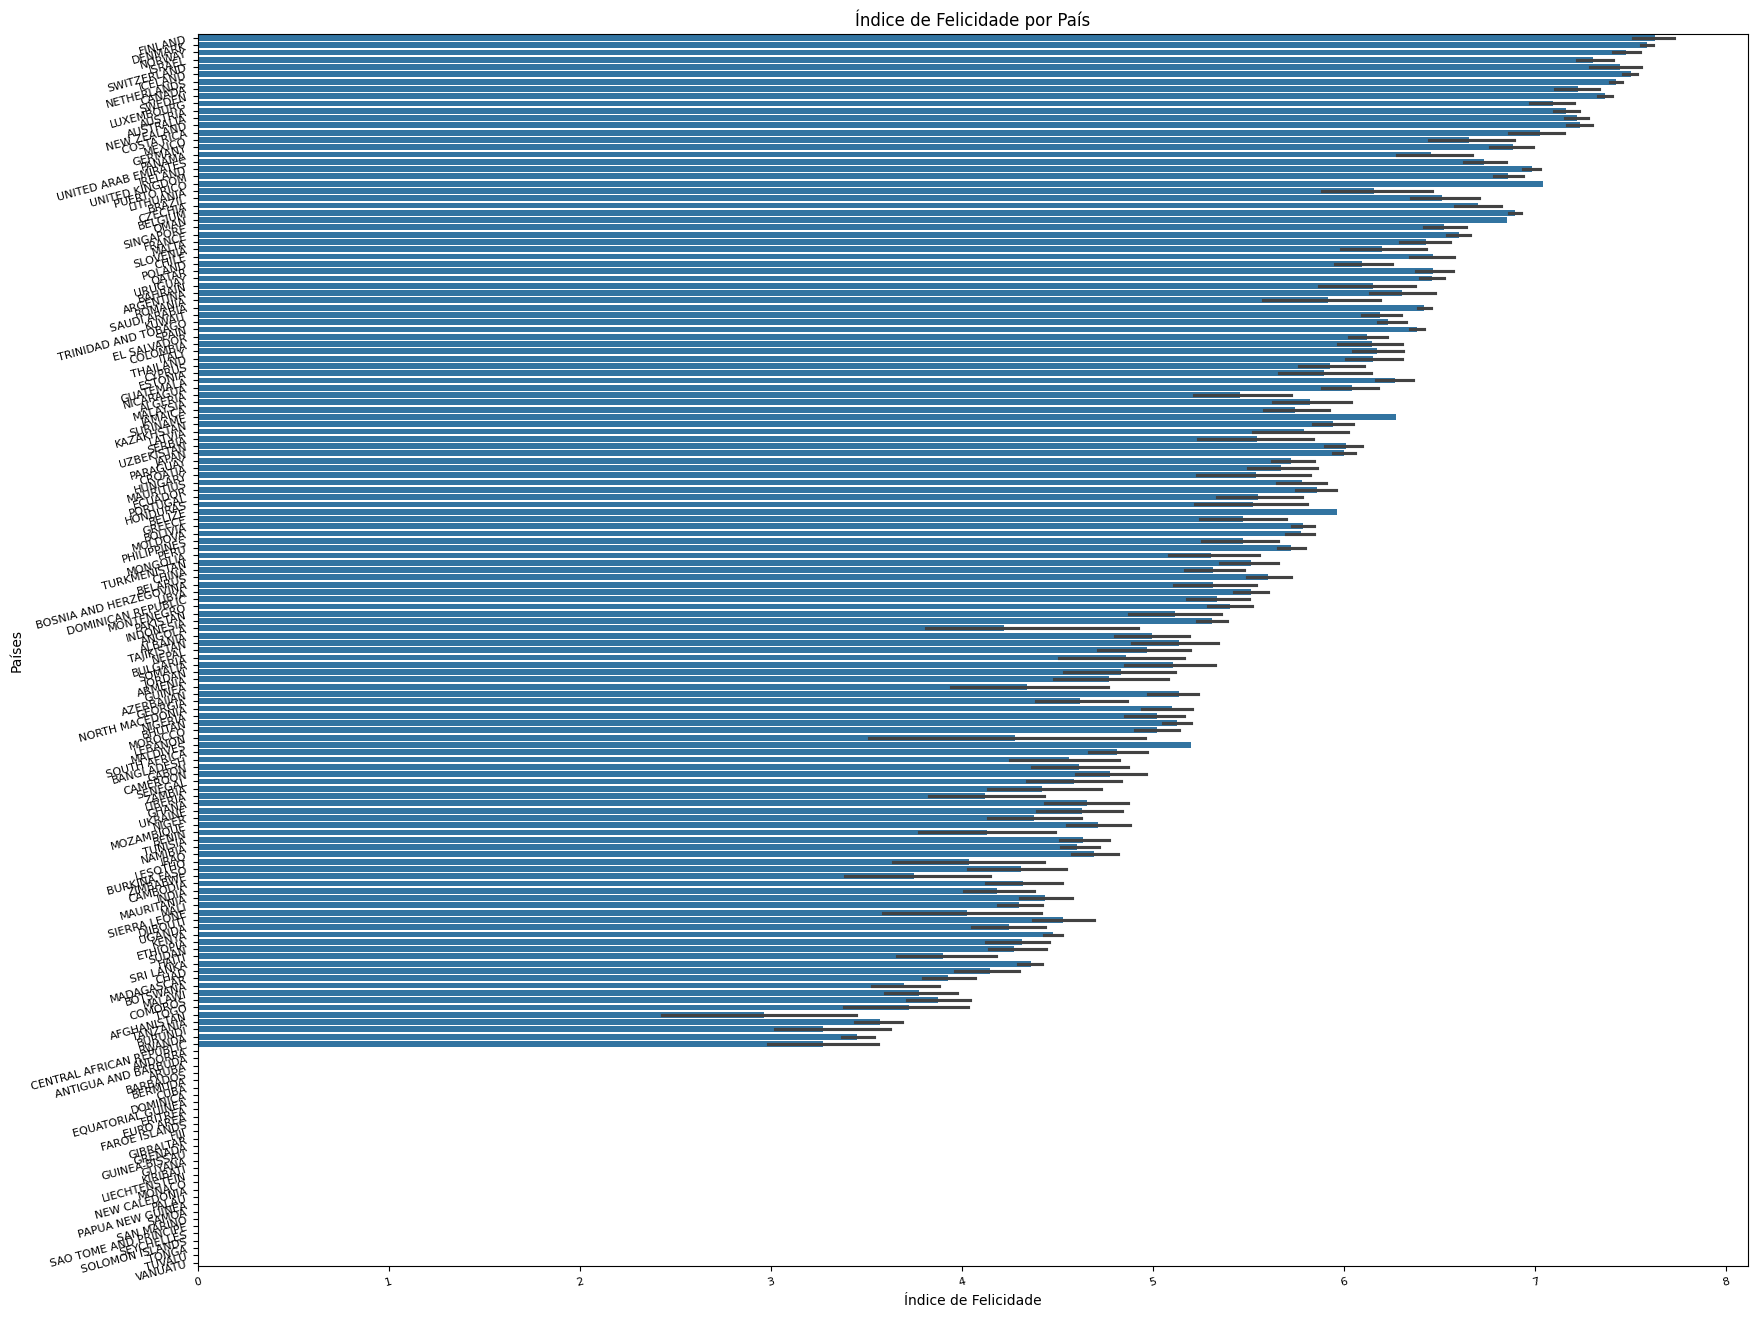

In [8]:
#Gráfico de Felicidade por País (Bar Plot)

df_sorted = df_combined.sort_values('Happiness Index 0 (unhappy) - 10 (happy)', ascending=False)

plt.figure(figsize=(20, 16))
plt.xticks(fontsize=8, rotation=15)
plt.yticks(fontsize=8, rotation=15)
sns.barplot(x='Happiness Index 0 (unhappy) - 10 (happy)', y='Country', data=df_sorted)
plt.title('Índice de Felicidade por País')
plt.xlabel('Índice de Felicidade')
plt.ylabel('Países')
plt.show()

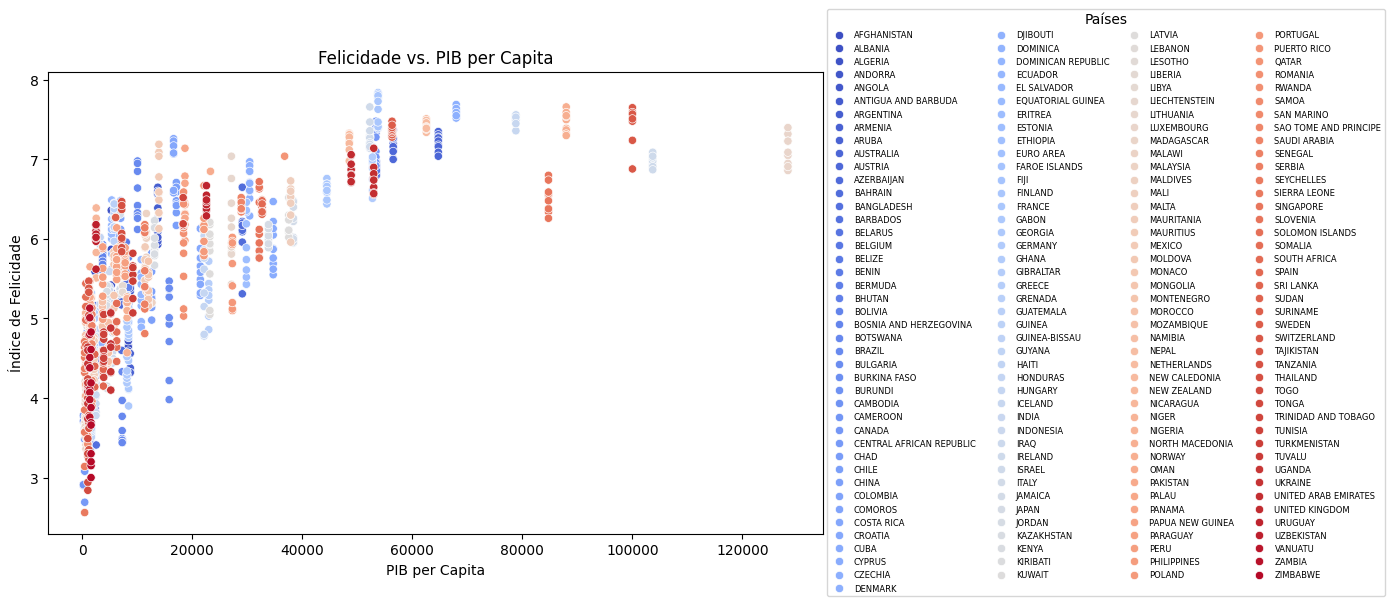

In [9]:
# Gráfico Relacionando Nível de Felicidade e Desenvolvimento Econômico (Scatter Plot)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='GPD Per Capita 2023', y='Happiness Index 0 (unhappy) - 10 (happy)', hue='Country', data=df_combined, palette='coolwarm')
plt.title('Felicidade vs. PIB per Capita')
plt.xlabel('PIB per Capita')
plt.ylabel('Índice de Felicidade')
plt.legend(title='Países', fontsize=6, title_fontsize='10',loc='center left', bbox_to_anchor=(1, 0.5), ncol=4)
plt.show()

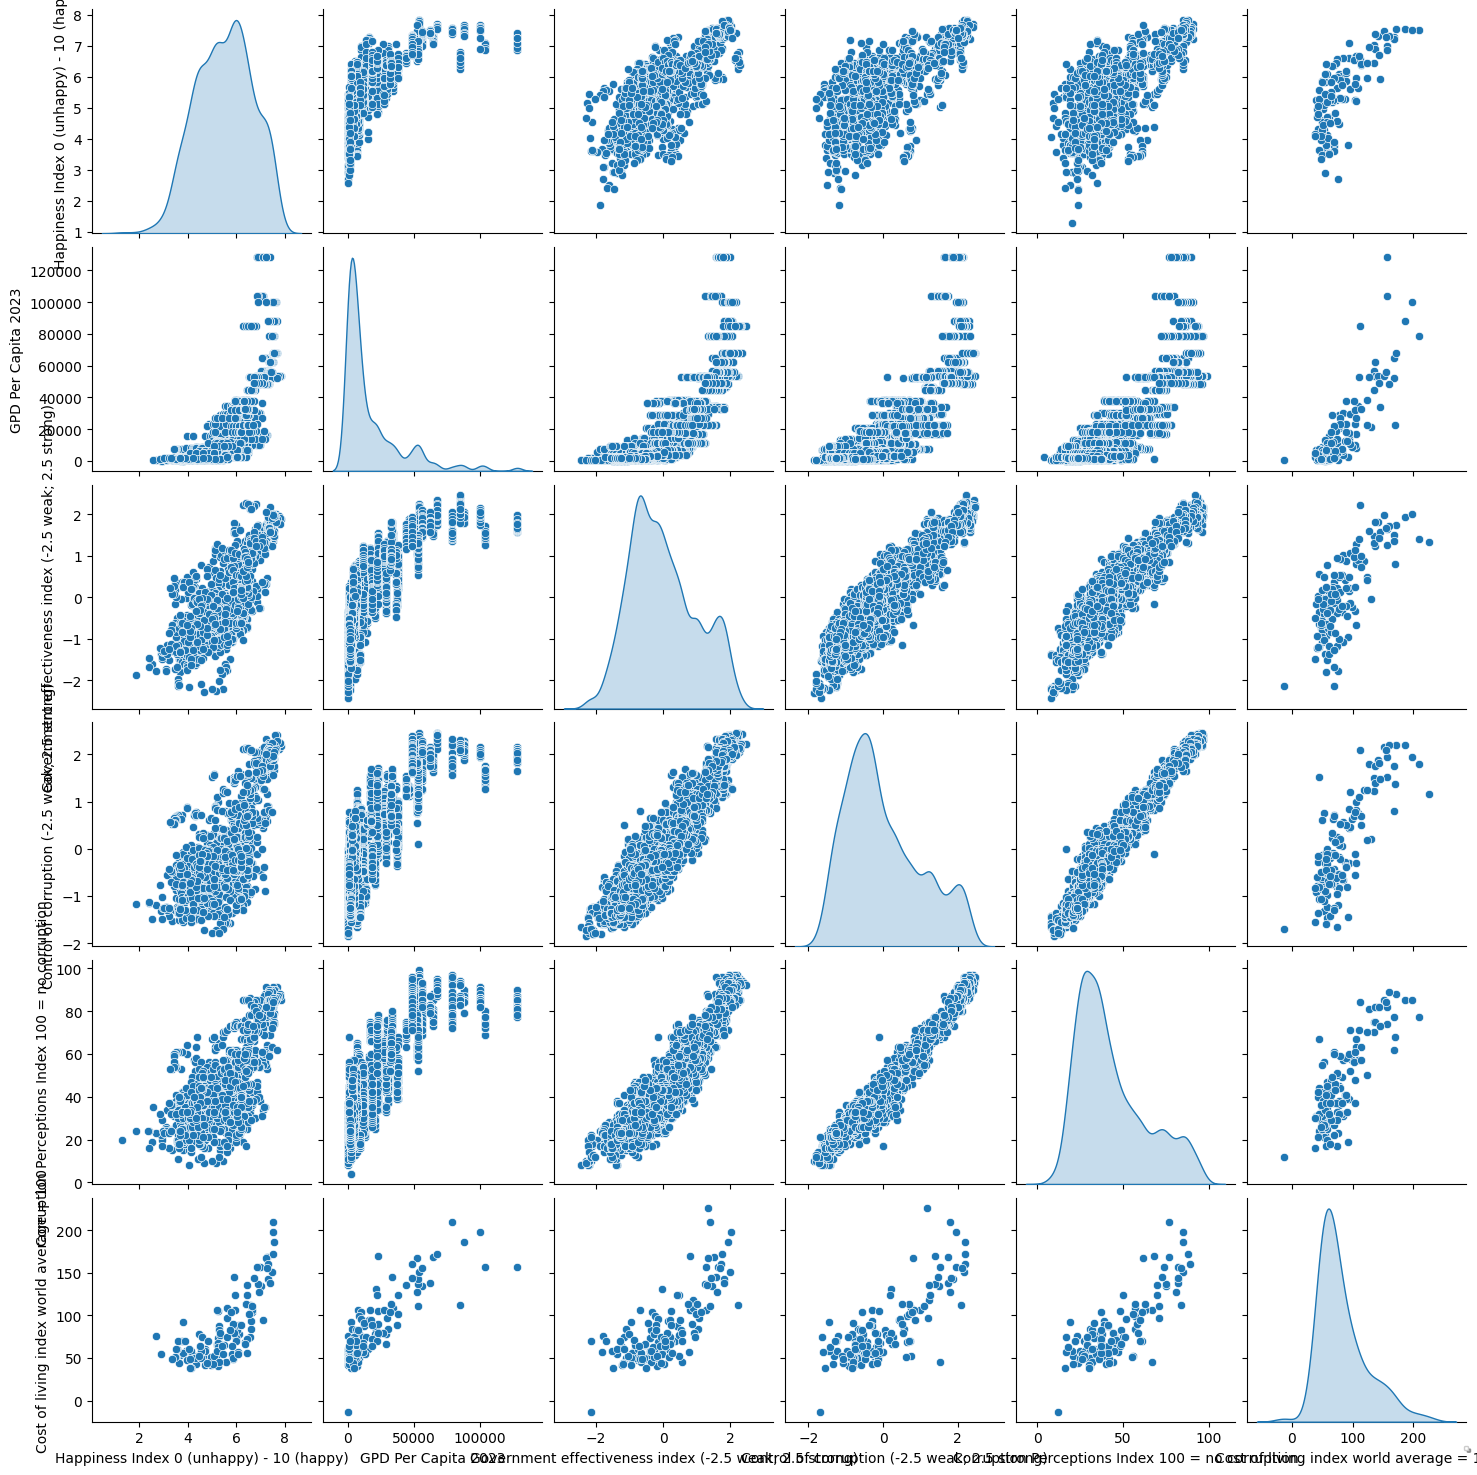

In [10]:
#Gráfico de Correlação entre Várias Variáveis (Pairplot)

sns.pairplot(df_combined[['Happiness Index 0 (unhappy) - 10 (happy)', 'GPD Per Capita 2023', 'Government effectiveness index (-2.5 weak; 2.5 strong)', 'Control of corruption (-2.5 weak; 2.5 strong)', 'Corruption Perceptions Index 100 = no corruption','Cost of living index world average = 100']], diag_kind='kde')
plt.legend(loc='upper center', bbox_to_anchor=(1, -0.10), shadow=True, ncol=3, fontsize=3)
plt.show()

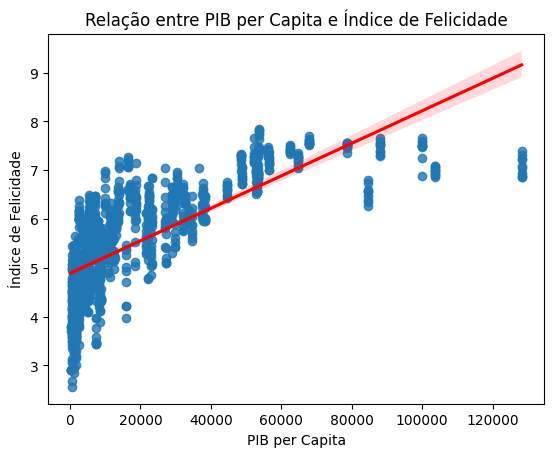

In [11]:
#Gráfico de Regressão Linear

sns.regplot(x='GPD Per Capita 2023', y='Happiness Index 0 (unhappy) - 10 (happy)', data=df_combined, line_kws={"color": "red"})
plt.title('Relação entre PIB per Capita e Índice de Felicidade')
plt.xlabel('PIB per Capita')
plt.ylabel('Índice de Felicidade')
plt.show()

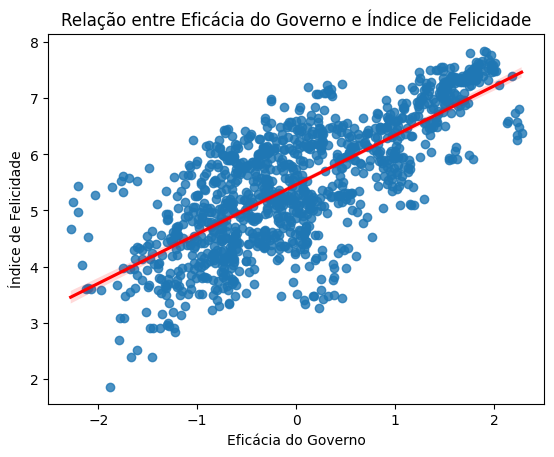

In [12]:
#Gráfico de Regressão Linear

sns.regplot(x='Government effectiveness index (-2.5 weak; 2.5 strong)', y='Happiness Index 0 (unhappy) - 10 (happy)', data=df_combined, line_kws={"color": "red"})
plt.title('Relação entre Eficácia do Governo e Índice de Felicidade')
plt.xlabel('Eficácia do Governo')
plt.ylabel('Índice de Felicidade')
plt.show()

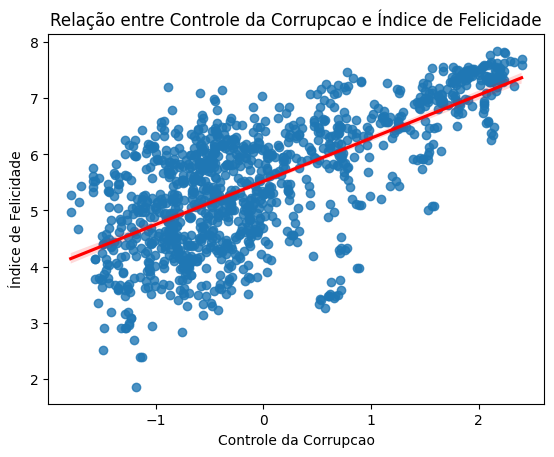

In [13]:
#Gráfico de Regressão Linear

sns.regplot(x='Control of corruption (-2.5 weak; 2.5 strong)', y='Happiness Index 0 (unhappy) - 10 (happy)', data=df_combined, line_kws={"color": "red"})
plt.title('Relação entre Controle da Corrupcao e Índice de Felicidade')
plt.xlabel('Controle da Corrupcao')
plt.ylabel('Índice de Felicidade')
plt.show()

In [14]:
# Métricas de Avaliação  NAO FUNCIONA PRECISAMOS AVALIAR

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

print(df_combined[['GPD Per Capita 2023', 'Government effectiveness index (-2.5 weak; 2.5 strong)', 'Happiness Index 0 (unhappy) - 10 (happy)']].head())


# Verificar se os nomes das colunas estão corretos
print(df_combined.columns)

# Verificar se há valores nulos
print(df_combined.isnull().sum())
df_combined.dropna(subset=['GPD Per Capita 2023', 'Government effectiveness index (-2.5 weak; 2.5 strong)', 'Happiness Index 0 (unhappy) - 10 (happy)'], inplace=True)


# Definir variáveis independentes (indicadores econômicos) e dependentes (felicidade)
X = df_combined[['GPD Per Capita 2023','Government effectiveness index (-2.5 weak; 2.5 strong)', 'Control of corruption (-2.5 weak; 2.5 strong)']]
y = df_combined['Happiness Index 0 (unhappy) - 10 (happy)']

print(f"Número de linhas em X: {X.shape[0]}")
print(f"Número de linhas em y: {y.shape[0]}")
print(X.head())  # Exibe as primeiras linhas de X
print(y.head())  # Exibe as primeiras linhas de y

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Calcular a acurácia com R²
accuracy = r2_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy}')



   GPD Per Capita 2023  \
0                  NaN   
1                  NaN   
2                  NaN   
3                  NaN   
4                  NaN   

   Government effectiveness index (-2.5 weak; 2.5 strong)  \
0                                              -2.17        
1                                                NaN        
2                                              -1.59        
3                                              -1.18        
4                                              -0.95        

   Happiness Index 0 (unhappy) - 10 (happy)  
0                                       NaN  
1                                       NaN  
2                                       NaN  
3                                       NaN  
4                                       NaN  
Index(['Country', 'Code', 'ContinentCode', 'Year',
       'Government spending as percent of GDP',
       'Government debt as percent of GDP', 'Economic growth forecast',
       'Inflation forecast', 

In [22]:
# nova regressao fazendo Ajustar Hiperparâmetros com os Dados
# Definir a Grade de Hiperparâmetros (param_grid): Especificamos uma grade de valores para n_estimators, max_depth, min_samples_split, e min_samples_leaf.
# Esses valores serão testados para encontrar a melhor combinação.
#GridSearchCV para Ajuste de Hiperparâmetros: Utilizamos GridSearchCV para testar diferentes combinações de parâmetros e escolher a que maximiza o R² no conjunto de treino

df_combined['GPD Per Capita 2023'] = df_combined['GPD Per Capita 2023'].fillna(df_combined['GPD Per Capita 2023'].median())
df_combined['Government effectiveness index (-2.5 weak; 2.5 strong)'] = df_combined['Government effectiveness index (-2.5 weak; 2.5 strong)'].fillna(df_combined['Government effectiveness index (-2.5 weak; 2.5 strong)'].median())
df_combined['Control of corruption (-2.5 weak; 2.5 strong)'] = df_combined['Control of corruption (-2.5 weak; 2.5 strong)'].fillna(df_combined['Control of corruption (-2.5 weak; 2.5 strong)'].median())
df_combined['Happiness Index 0 (unhappy) - 10 (happy)'] = df_combined['Happiness Index 0 (unhappy) - 10 (happy)'].fillna(df_combined['Happiness Index 0 (unhappy) - 10 (happy)'].median())

# Passo 3: Definir as variáveis independentes (X) e dependente (y)
X = df_combined[['GPD Per Capita 2023','Government effectiveness index (-2.5 weak; 2.5 strong)', 'Control of corruption (-2.5 weak; 2.5 strong)']]
y = df_combined['Happiness Index 0 (unhappy) - 10 (happy)']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 4: Definir a grade de hiperparâmetros para o ajuste
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Criar o modelo Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Realizar a busca em grade (GridSearch) para encontrar os melhores parâmetros
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Exibir os melhores parâmetros encontrados
print(f"Melhores parâmetros: {grid_search.best_params_}")

# Avaliar o modelo ajustado
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print(f'Acurácia do modelo ajustado (R²): {accuracy}')

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Melhores parâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Acurácia do modelo ajustado (R²): 0.9182157309484612


In [23]:
#Código para Regressão com Gradient Boosting e XGBoost
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# Preencher valores nulos com a mediana
df_combined['GPD Per Capita 2023'] = df_combined['GPD Per Capita 2023'].fillna(df_combined['GPD Per Capita 2023'].median())
df_combined['Government effectiveness index (-2.5 weak; 2.5 strong)'] = df_combined['Government effectiveness index (-2.5 weak; 2.5 strong)'].fillna(df_combined['Government effectiveness index (-2.5 weak; 2.5 strong)'].median())
df_combined['Control of corruption (-2.5 weak; 2.5 strong)'] = df_combined['Control of corruption (-2.5 weak; 2.5 strong)'].fillna(df_combined['Control of corruption (-2.5 weak; 2.5 strong)'].median())
df_combined['Happiness Index 0 (unhappy) - 10 (happy)'] = df_combined['Happiness Index 0 (unhappy) - 10 (happy)'].fillna(df_combined['Happiness Index 0 (unhappy) - 10 (happy)'].median())

# Definir variáveis independentes (indicadores econômicos) e dependentes (felicidade)
X = df_combined[['GPD Per Capita 2023', 'Government effectiveness index (-2.5 weak; 2.5 strong)', 'Control of corruption (-2.5 weak; 2.5 strong)']]
y = df_combined['Happiness Index 0 (unhappy) - 10 (happy)']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo 1: Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)
accuracy_gbr = r2_score(y_test, y_pred_gbr)
print(f'Acurácia do modelo Gradient Boosting (R²): {accuracy_gbr}')

# Modelo 2: XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, objective='reg:squarederror')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = r2_score(y_test, y_pred_xgb)
print(f'Acurácia do modelo XGBoost (R²): {accuracy_xgb}')


Acurácia do modelo Gradient Boosting (R²): 0.8634575027236351
Acurácia do modelo XGBoost (R²): 0.8609330173037641


In [24]:
## Coeficientes de Importância: Tanto o Random Forest quanto o Gradient Boosting e XGBoost fornecem uma lista das variáveis mais importantes para as previsões.
## Identificar essas variáveis pode revelar quais fatores econômicos têm maior impacto sobre o nível de felicidade dos países.

importances = best_rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                                             Feature  Importance
0                                GPD Per Capita 2023    0.845043
2      Control of corruption (-2.5 weak; 2.5 strong)    0.090618
1  Government effectiveness index (-2.5 weak; 2.5...    0.064339


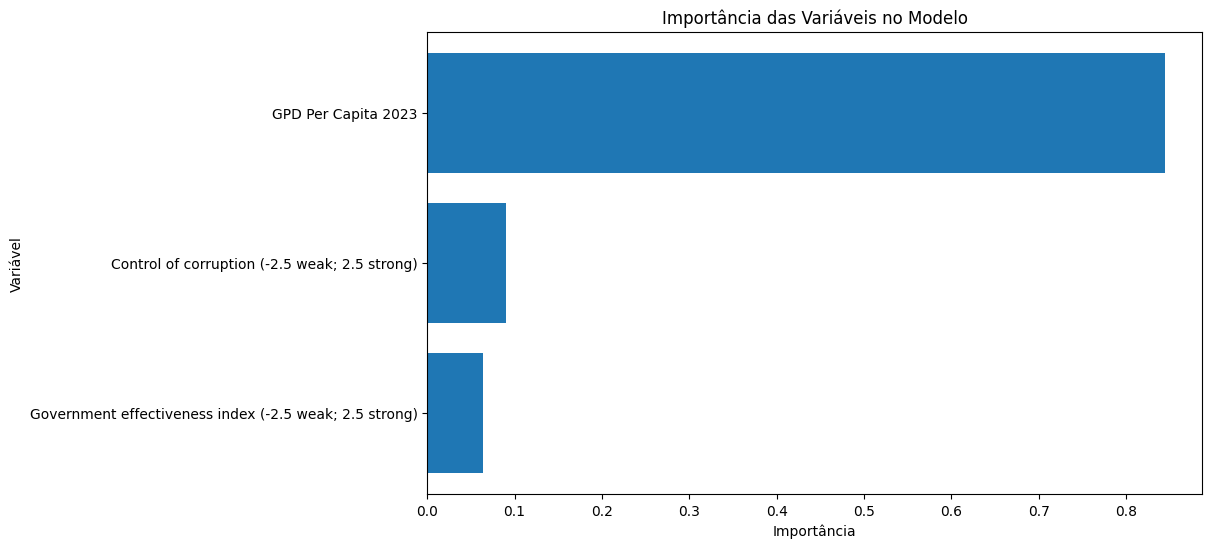

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title("Importância das Variáveis no Modelo")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.gca().invert_yaxis()
plt.show()


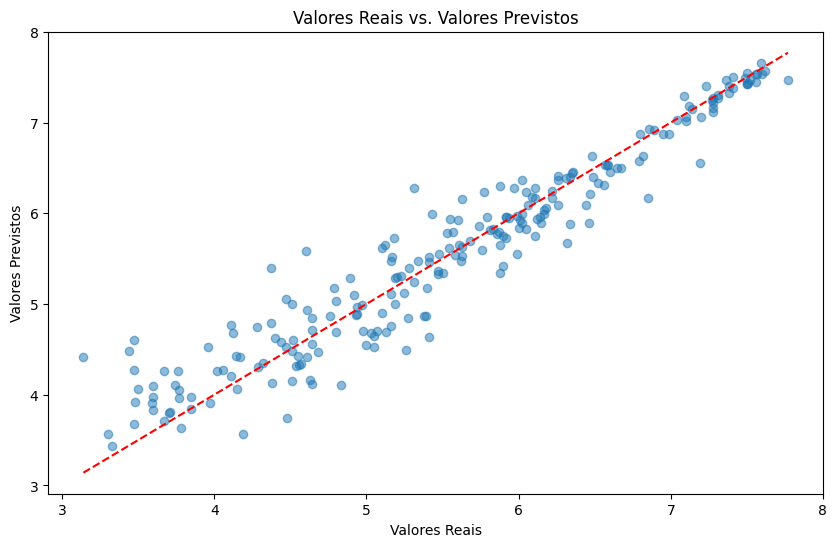

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Valores Reais vs. Valores Previstos")
plt.show()
